In [1]:
# Necssary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
#from mpl_toolkits.basemap import Basemap
import re
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [2]:
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [4]:
df_default=pd.get_dummies(df['default'])
df_student=pd.get_dummies(df['student'])
df['default'] = df_default
df['student'] = df_student
df.head()

,default,student,balance,income
1,0.0,0.0,729.526495,44361.625074
2,0.0,1.0,817.180407,12106.134700
3,0.0,0.0,1073.549164,31767.138947
4,0.0,0.0,529.250605,35704.493935
5,0.0,0.0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

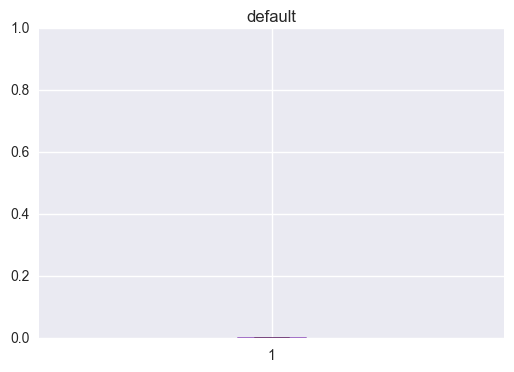

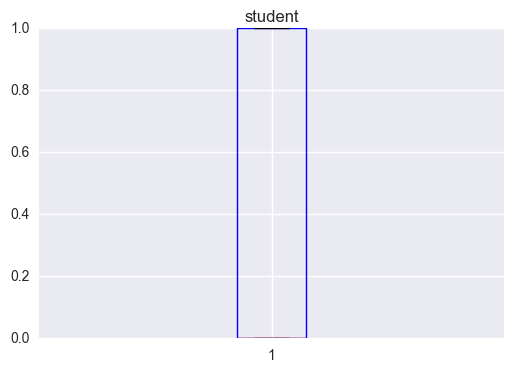

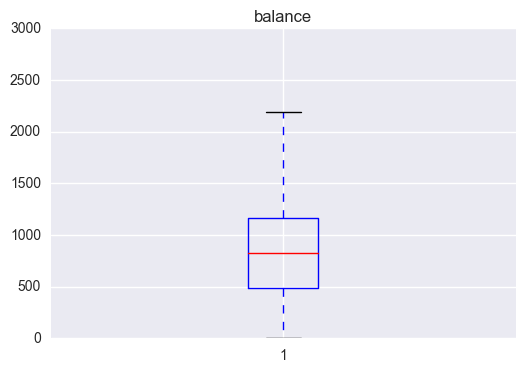

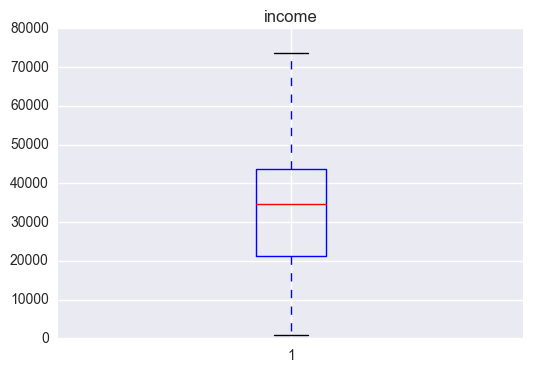

In [5]:
for var in ['default','student','balance','income']:
    plt.boxplot(np.array(df[var]))
    plt.title(var)
    plt.show()


In [6]:
balance = df.balance
student = df.student
income = df.income
default = df.default


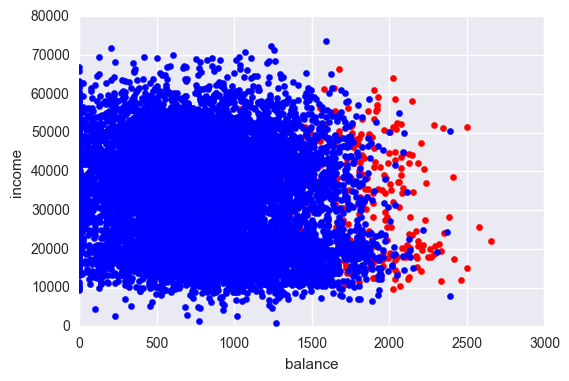

In [7]:
xr = []
xb = []
yr = []
yb = []
for i in range(10000):
    
    if default.iloc[i]:
        xr.append(balance.iloc[i])
        yr.append(income.iloc[i])
    else:
        xb.append(balance.iloc[i])
        yb.append(income.iloc[i])
plt.scatter(xr,yr,color='r')
plt.scatter(xb,yb,color='b')
plt.xlabel("balance")
plt.ylabel("income")
plt.xlim(0,3000)
plt.ylim(0,80000)
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

Area under the ROC curve : 0.942340


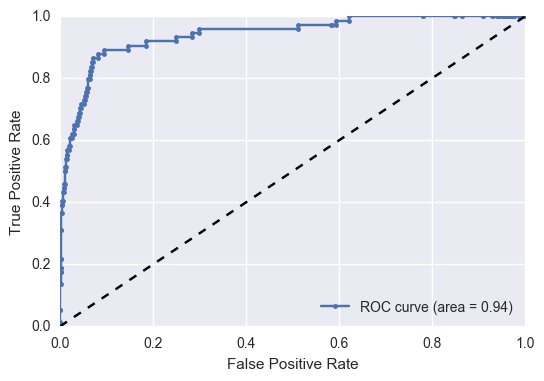

In [8]:
X = pd.concat([balance,income],axis=1)
y = default


# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    split = int(n_samples/5)
    X_train, X_test = X[split:], X[:split]
    y_train, y_test = y[split:], y[:split]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print "Area under the ROC curve : %f" % roc_auc
    return fpr, tpr, roc_auc, thresholds

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
   
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

[[  4.84969886e-03   9.80606054e-06]] [-9.87519356]


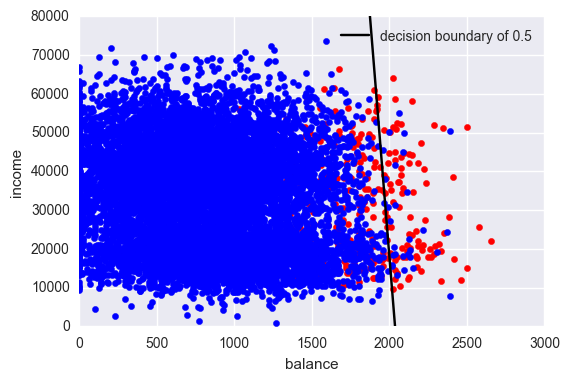

In [9]:

clf = LogisticRegression(C=0.1,penalty='l1')
clf.fit(X,y)
print clf.coef_, clf.intercept_
xx = np.linspace(0,3000,1000)
yy = (-clf.intercept_[0] - clf.coef_[0][0]*xx) / clf.coef_[0][1]
plt.plot(xx,yy,'k',label='decision boundary of 0.5')
xr = []
xb = []
yr = []
yb = []
for i in range(10000):
    
    if default.iloc[i]:
        xr.append(balance.iloc[i])
        yr.append(income.iloc[i])
    else:
        xb.append(balance.iloc[i])
        yb.append(income.iloc[i])
plt.scatter(xr,yr,color='r')
plt.scatter(xb,yb,color='b')
plt.xlabel("balance")
plt.ylabel("income")
plt.xlim(0,3000)
plt.ylim(0,80000)
plt.legend(loc='upper right')
plt.show()


5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

[-0.00410031  0.06270691  0.00111321] 0.0326179824712
Area under the ROC curve : 0.944473
Slight improvement of performance using an additional variable and ridge regression.


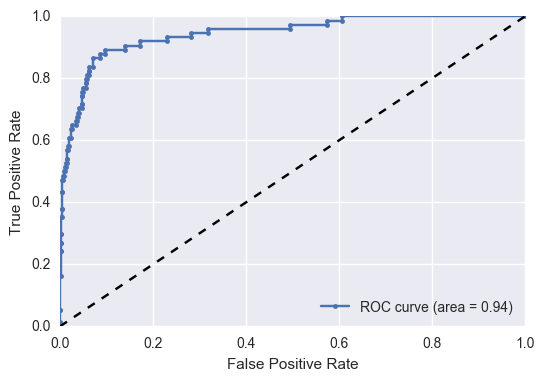

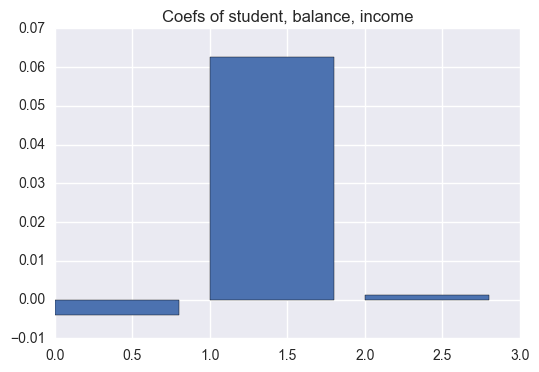

In [13]:
X = pd.concat([student,balance,income],axis=1)
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)
y = default
def generate_auc_ridge(X,y):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    split = int(n_samples/5)
    X_train, X_test = X[split:], X[:split]
    y_train, y_test = y[split:], y[:split]
    
    # Choose SVC classifier.
    classifier = Ridge(alpha=0.001)
    regr = classifier.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print regr.coef_,regr.intercept_
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print "Area under the ROC curve : %f" % roc_auc
    
    return fpr, tpr, roc_auc, thresholds, regr.coef_, regr.intercept_
fpr,tpr,roc_auc, thresholds,coef,intercept = generate_auc_ridge(X,y)
print "Slight improvement of performance using an additional variable and ridge regression."
generate_ROCplot(fpr,tpr,'LR',roc_auc)
plt.bar([0,1,2],coef)
plt.title("Coefs of student, balance, income")
plt.show()

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

Area under the ROC curve : 0.957097


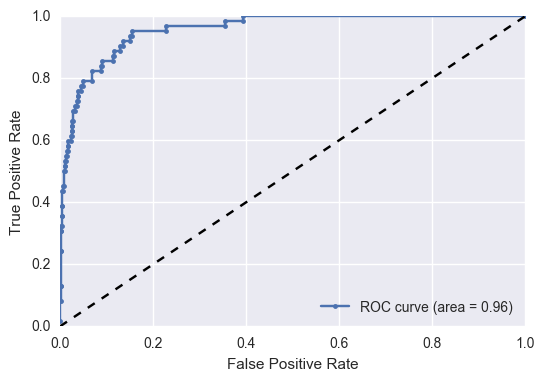

Area under the ROC curve : 0.949842


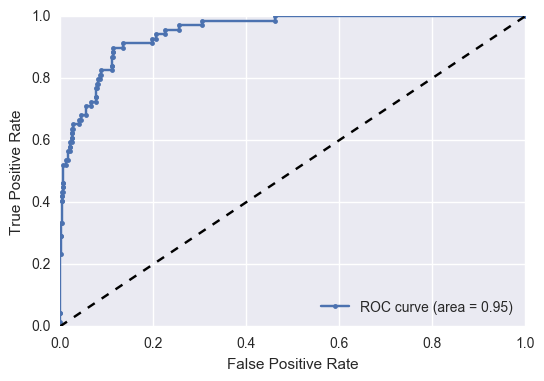

Area under the ROC curve : 0.956308


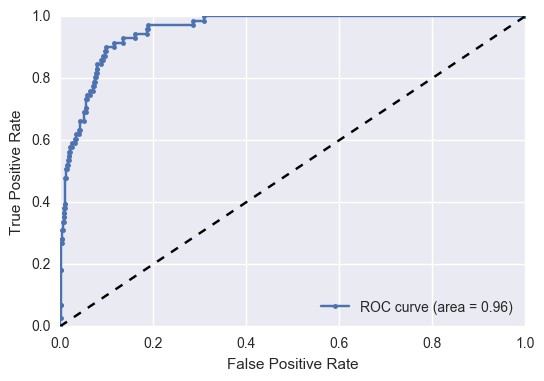

Area under the ROC curve : 0.947565


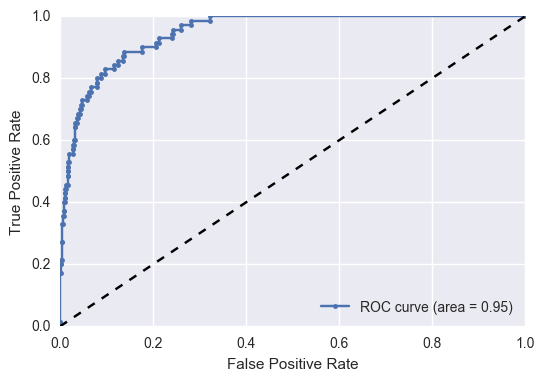

Area under the ROC curve : 0.933378


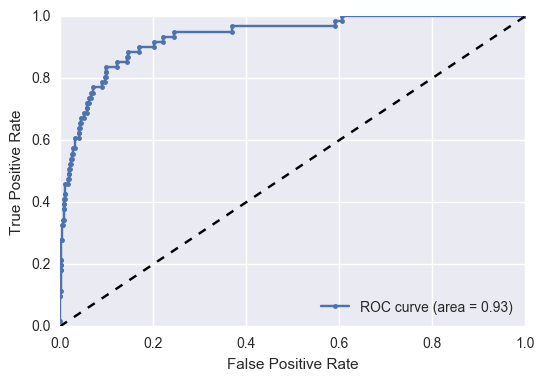

Slight variation of performance over 5 folds but generally strong and stable.


In [11]:
#cross-validation
def generate_auc_ridge_5fold(X,y):
    kf = KFold(len(X),n_folds=5,shuffle=True)
    
    y_pred = np.zeros(len(y))
   
    # Iterate through folds
    for train_index, test_index in kf:
        X_train = []
        y_train = []
        for i in train_index:
            X_train.append(X[i])
            y_train.append(y.iloc[i])
        X_test = []
        y_test = []
        for i in test_index:
            X_test.append(X[i])
            y_test.append(y.iloc[i])
    # Choose SVC classifier.
        classifier = Ridge(alpha=0.001)
        regr = classifier.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
    
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        print "Area under the ROC curve : %f" % roc_auc
        generate_ROCplot(fpr,tpr,'LR',roc_auc)
    
generate_auc_ridge_5fold(X,y)
print "Slight variation of performance over 5 folds but generally strong and stable."


7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [14]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

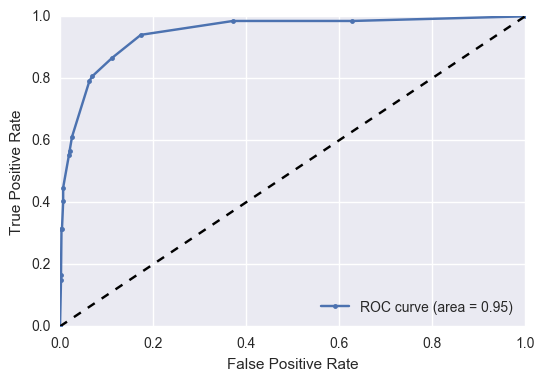

AttributeError: 'NoneType' object has no attribute 'write'

In [52]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from __future__ import print_function
import pydotplus
import os
import subprocess
from IPython.display import Image 
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
random_state = np.random.RandomState(0)
# Construct training and testing set.
X, y = shuffle(X, y, random_state=random_state)
n_samples, n_features = X.shape
split = int(n_samples/5)
X_train, X_test = X[split:], X[:split]
y_train, y_test = y[split:], y[:split]
# Fit regression model

regr_5 = DecisionTreeRegressor(max_depth=5)

dt = regr_5.fit(X_train, y_train)

# Predict

y_pred = regr_5.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
#Visualize



#visualize_tree(dt, feature_names=['student','balance','income'])
dot_data=export_graphviz(dt,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

8) Find the optimal decision tree depth and compute the AUC ROC. 

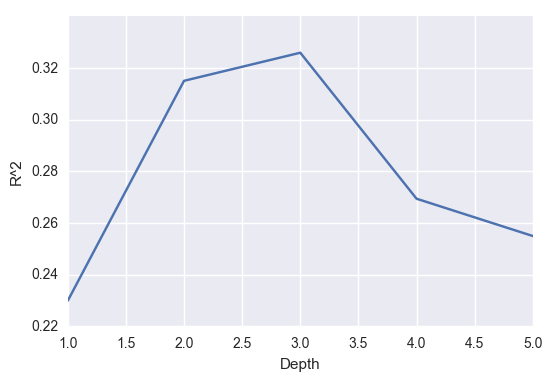

In [60]:
random_state = np.random.RandomState(42)
# Construct training and testing set.
X, y = shuffle(X, y, random_state=random_state)
n_samples, n_features = X.shape
split = int(n_samples/5)
X_train, X_test = X[split:], X[:split]
y_train, y_test = y[split:], y[:split]
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,6)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]

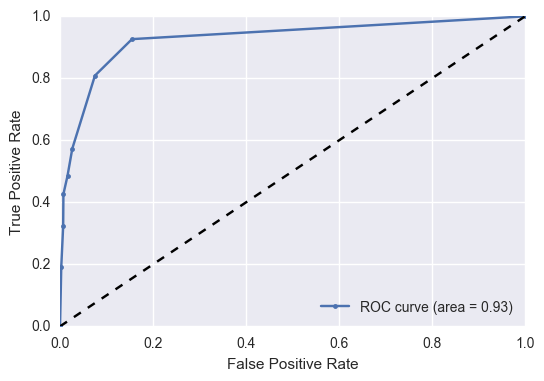

In [61]:
regr_opt = DecisionTreeRegressor(max_depth=n_opt)
regr_opt.fit(X_train, y_train)

y_pred = regr_opt.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
generate_ROCplot(fpr,tpr,'LR',roc_auc)

AUC ROC of the optimal depth of 3 is 0.93.